# Section 0: Standing at the gate of a fresh new world

## What is Julia
* [Julia](https://julialang.org/) is an open-source, multi-platform, high-level, high-performance programming language for technical computing.
* Julia has an [LLVM](https://en.wikipedia.org/wiki/LLVM)-based [JIT](https://en.wikipedia.org/wiki/Just-in-time_compilation) compiler that allows it to match the performance of languages such as C and [FORTRAN](https://en.wikipedia.org/wiki/FORTRAN) without the hassle of low-level code. Because the code is compiled on the fly you can run (bits of) code in a shell or [REPL](https://en.wikipedia.org/wiki/Read%E2%80%93eval%E2%80%93print_loop), which is part of the recommended workflow.
* Julia is dynamically typed, provides [multiple dispatch](https://en.wikipedia.org/wiki/Multiple_dispatch), and is designed for parallelism and distributed computation.
* Julia has a built-in package manager [Pkg3](https://docs.julialang.org/en/v1/stdlib/Pkg/index.html).
* Julia has many built-in mathematical functions, including special functions (e.g. Gamma), and supports complex numbers right out of the box.
* Julia allows you to generate code automagically thanks to [Lisp](https://en.wikipedia.org/wiki/Lisp_(programming_language))-inspired macros.
* Julia was born in 2012.

## Learn Julia
#### Book
[Think Julia](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html), Allen Downey and Ben Lauwens

[Hands-On Design Patterns and Best Practices with Julia: Proven solutions to common problems in software design for Julia 1.x](https://www.amazon.com/Hands-Design-Patterns-Julia-comprehensive-ebook/dp/B07SHV9PVV), Tom Kwong
#### Cousera online  Course
[Julia Scientific Programming](https://www.coursera.org/learn/julia-programming)
#### Other Coding Tutorial
[TutorialForPhysicists - Roger](https://github.com/Roger-luo/TutorialForPhysicists.jl)

## Julia ABC
* To enter julia REPL, type `julia` in your terminal (PATH variable in shell should be set correctly).
* To get help, type `?` in a Julia REPL to enter `API` mode.
* To install a julia package, type `]` in a Julia REPL to enter `Pkg` mode. Type `?[Enter]` if you want some help in `Pkg` mode.
* To run shell command, type `;` in a julia REPL to enter shell mode.
* To input `≈`, type `\approx[TAB]`, other unicodes can be typed similarly, check [here](https://docs.julialang.org/en/v1/manual/unicode-input/).
* Special "function" names that start with `@` is called a [macro](https://docs.julialang.org/en/v1/manual/metaprogramming/). It runs in compile time, and changes the expression directly. For example, `@test` is a macro that throws an exception whenever the statement following which returns `false`.


## [Cheat Sheet](https://juliadocs.github.io/Julia-Cheat-Sheet/) [$\leftarrow$ CLICK] is available!
### **What's Special?**

In [ ]:
# how to import a package
using Test
using LinearAlgebra: I

# matrix, type `\sigma[TAB]\^y[TAB]` to input σʸ
σʸ = [0 -im; im 0]
# transpose
@test (im*σʸ)' == -(im*σʸ)
# broadcast/vectorize (every function can vectorize)
@test σʸ.^2 == [0 -1; -1 0]

# how to print
println("hello $σʸ !")
@show σʸ[1:end,:] # index as an array, start from 1!
@show σʸ[1:end]   # index as a vector

# void
@test NaN != nothing

# List like vector
arr = Float64[]
push!(arr, 3)
brr = Any[1,2]
brr[1] = "Some text";

# Section I: Take your weapon and arm yourselves
In this section, we will learn the toolchain for physicists

## Basic Array Operations

In [ ]:
# Julia Matrix Operation is fast. To know how fast it is, you need a benchmark package. Type `]` and `add BenchmarkTools<Enter>` in your REPL.
using BenchmarkTools, Test

cnot = [1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0]  # a matrix
b = [1, 1im, true, 0.4e2] # a vector
c = [1, 1im, 0.4e2, true] # a vector

# run tests
@test cnot*b ≈ c
@test_throws DimensionMismatch cnot*randn(3)  # expected to raise specific error

# run a benchmark
res1 = @benchmark $cnot*$b  # `$` sign means evaluation first, used in `@benchmark` to avoid taking time to evaluate cnot input account.

## Faster Array Operations for Small Matrices

Static arrays do not have allocations, it is widely used in the quantum circuit simulator [Yao.jl](https://github.com/QuantumBFS/Yao.jl).

### **Challenge!**
Read the documentation of package `StaticArrays`
https://github.com/JuliaArrays/StaticArrays.jl
and show it is really fast!

In [ ]:
# install `StaticArrays`

using StaticArrays: SMatrix, SVector
scnot = SMatrix{4, 4}(cnot)
sb = SVector{4}(b)

@testset "static arrays" begin
    @test scnot*sb ≈ c
    using Statistics: median
    res2 = @benchmark $scnot*$sb
    println("median of time is $(median(res2).time)")
    @test median(res2).time < median(res1).time / 5  # at least 5 times faster
end

## Linear Algebra

Linear algebra functions are described in [docs](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/).
They are widely used in quantum Monte Carlo, Machine learning et al.

### **Challenge!**
Try to figure out how to use get eigenvalues, singular values, QR-decomposition, determinant and trace for `cnot` matrix and pass the test

In [ ]:
using LinearAlgebra: eigen, svd, qr, I, det, tr
# hint, here you probabily want to type `?` and `eigen<Enter>` to get help in an REPL.

sv_cnot = svd(cnot).S
ev_cnot = eigen(cnot).values
q_cnot = qr(cnot).Q
det_cnot = det(cnot)
tr_cnot = tr(cnot)

@testset "linalg" begin
    @test sv_cnot ≈ ones(4)
    @test ev_cnot ≈ [-1, 1, 1, 1]
    @test q_cnot*q_cnot' ≈ I
    @test det_cnot == -1
    @test tr_cnot == 2
end

## Large sparse matrix eigensolver

[KrylovKit](https://github.com/Jutho/KrylovKit.jl) is a package for solving large sparse matrix.


### **Used in**
* Exact diagonalization
* Cluster pertubation theory (CPT)
* Numerical Renomalization Group

### **Challenge!**
Get the lowest singular value of specific sparse matrix

In [ ]:
using SparseArrays: SparseMatrixCSC, sparse, nnz
sp = kron(SparseMatrixCSC(cnot), sparse(I, 100, 100))

# install `KrylovKit`
using KrylovKit: eigsolve
vals = eigsolve(sp, 1, :SR)[1]

@testset "sparse" begin
    @test sp |> nnz == 100*4    # here `x |> f` is same as calling f(x).
    @test vals[1] ≈ minimum(eigen(sp |> Matrix).values)
end

## Tensor contraction

[OMEinsum](https://github.com/under-Peter/OMEinsum.jl), [TensorOperations](https://github.com/Jutho/TensorOperations.jl) and [ITensors](https://github.com/ITensor/ITensors.jl) are high performance packages for tensor contractions.
These packages are used in machine learning and tensor network simulations. `OMEinsum` features hyper-optimized contraction order finding, `TensorOperations` features low overhead tensor contraction, while `ITensors` is domain specific package targeting physical applications such as TRG, DMRG.


### **Challenge!**
Try to calculate the following contraction
$C_{lj} = A_{i,j,k}B_{i,k,l}$

In [ ]:
A = randn(6, 10, 5)
B = randn(6, 5, 7)

# install OMEinsum
using OMEinsum
C = ein"ijk,ikl->lj"(A, B)

@test C |> size == (7, 10)

## Save and load data

[DelimitedFiles](https://docs.julialang.org/en/v1/stdlib/DelimitedFiles/index.html) is the `txt` format save and load standard module.

[JLD2 and FileIO](https://github.com/simonster/JLD2.jl) uses HDF5 format to save and load, suited for large data file.


### **Challenge!**
Read out the saved data.

In [ ]:
using DelimitedFiles

a = randn(Float64, 3,3)
writedlm("data/_test.dat", a)
b = readdlm("data/_test.dat")

# FileIO
# install FileIO and JLD2
using FileIO, JLD2
jldopen("data/_example.jld2", "w") do f
    f["A"] = a
end

b_jld2 = load("data/_example.jld2")["A"]
@testset "file reading" begin
    @test b ≈ a
    @test b_jld2 ≈ a
end

# Section II: Road to master

## Correctly Dispatch Functions

[Function]((https://docs.julialang.org/en/v1/manual/functions/)) can be dispatched by types, so it heavily relied on [type trees](https://docs.julialang.org/en/v1/manual/types/).
[Macro](https://docs.julialang.org/en/v1/manual/metaprogramming/#Macros-and-dispatch-1) is similar to function, but is a kind of code generation!

In [ ]:
"""This is a utility of showing subtype tree."""
function subtypetree(t, level=1, indent=4)
   level == 1 && println(t)
   for s in subtypes(t)
     println(join(fill(" ", level * indent)) * string(s))
     subtypetree(s, level+1, indent)
   end
end

In [ ]:
subtypetree(Number)

In [ ]:
dump(Array)

### **Challenge!**
Fix following tests.

In [ ]:
@testset "types" begin
    @test 1.0 isa Float64
    @test 1.0 isa Real
    @test typeof(1.0) == Float64
    
    # type relation
    @test Int64 <: Int
    @test Int64 === Int
    @test Int64 <: Integer
    @test Int64 <: Union{Int64, Complex}
    @test Array{ComplexF64, 3} <: Array{ComplexF64}
    @test Array{ComplexF64, 3} <: Array{<:Complex, 3}
    @test supertype(Integer) == Real
    @test Signed in subtypes(Integer)
    
    # type promotion
    @test eltype(promote(1.0, 2im)) == ComplexF64
    @test promote_type(Float32, Float64) == Float64
    @test promote_type(Int64, Real, Float64) == Real
    
    # element types
    @test eltype([1, 2, 3.0]) == Float64
    @test eltype(Int[1, 2, 3.0]) == Int64
    
end

In [ ]:
# define function f
f(x) = x^2
function f(x::Vector{T}) where T  # `where` means we want to know the type parameter T.
    println("we get type `$T`!")
    append!(copy(x), x)
end
function f(x::Vector{<:Complex})
    append!(copy(x), x |> conj)
end
# inplace vector version of f
function f!(x::Vector)
    append!(x, x)
end
f(x::String) = x^2
macro f(x)
   return :($(x^2))
end

@testset "functions" begin
    # function and broadcast
    @test f(3) == 9
    @test f.([1,2,3,4,5]) == [1,4,9,16,25]  # broadcast
    
    # macro
    @test (@f 3) == 9
    #=
    var = 3
    @test (@f var) == 9     # try to uncomment this line!
    =#
    
    @test f("bili") == "bilibili"
    @test f.(["bili", "dili"]) == ["bilibili", "dilidili"]

    x = [1, 2, 3]
    y = [1im, 2+3im, 3]
    @test f(x) == [1,2,3,1,2,3]  # repeat the array
    @test f(y) == [1im,2+3im,3,-1im,2-3im,3]  # repeat, but with conjugate
    y = copy(x)
    @test (f!(y); y) == [1,2,3,1,2,3]  # inplace version of f
end

### **Challenge!**
Metaprogramming can be used to generate functions! Try to generate functions after reading [this section](https://docs.julialang.org/en/v1/manual/metaprogramming/#Generated-functions-1).

Metaprogramming is a **black technology** in Julia, especially important in multiple dispatch framework. It will save you time if used properly, but can also cause trouble in code readability (where is this function defined?).

In [ ]:
FUNCS = Symbol.('a' .+ (0:4))

for FUNC in FUNCS
    @eval $(Symbol(FUNC, :_gen))(x::Int) = x^2
end

@testset "generated functions" begin
    @test a_gen(3) == 9
    @test b_gen(3) == 9
    @test c_gen(3) == 9
    @test d_gen(3) == 9
    @test e_gen(3) == 9
end

## Type Stability

[Type stability](https://docs.julialang.org/en/v1/manual/performance-tips/index.html#Avoid-changing-the-type-of-a-variable-1) is very important knowledge for writing high performance Julia programs.

### **Challenge!**
Fix the allocation below to increase the performance of calculating Fibonacci.

In [ ]:
# fix Fibonacci to improve performance
function fib(n)
    a = 0
    b = 1
    for i = 1:n-1
        c = a + b
        a = b
        b = c
    end
    b
end
display(@benchmark fib(30))

# @code_warntype will tell you a lot of type information,
# if a type is not stable, it will be marked as red, with a lot of allocations.
display(@code_warntype fib(30))

In [ ]:
@testset "fibonacci" begin
    @test fib(30) == 832040
    @test (@allocated fib(30))  == 0
end

# Final Challenge
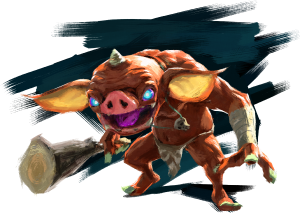
Give data file `data/example.txt`, with each row a tuple of $i, j, w_{ij}$.
The problems is to find the ground state configuration of the classical Ising hamiltonian $H = \sum\limits_{i,j} w_{ij}\sigma_i \sigma_j$

This is the code chanlledge of 2016 UCAS summer school.

In [ ]:
readdlm("programs/example.txt")

### **Challenge!**
Fix the code of simulated annealing

1. correctify the code
2. improve the performance

In [ ]:
# please open `simulated_annealing.ipynb` to continue